In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import xarray as xr
import datetime
import time 
from timezonefinder import TimezoneFinder
import pytz
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

from palettable.colorbrewer.sequential import OrRd_6
from palettable.colorbrewer.sequential import YlGn_9
from palettable.colorbrewer.sequential import YlGnBu_8
from palettable.colorbrewer.sequential import RdPu_5

In [118]:
cols = ['date', 'jday', 'time', 
        'leaves', 'mature_lvs', 'drop_lvs', 'LA', 'LA_dead', 'LAI', 
        'RH', 'leaf_WP', 'PFD', 'solrad', 'temp_soil', 'temp_air', 'temp_can', 'ET_dmd', 'ET_suply',
        'Pn', 'Pg', 'resp', 'av_gs', 'LAI_sunlit', 'LAI_shaded', 'PFD_sunlit', 'PFD_shaded', 
        'An_sunlit', 'An_shaded', 'Ag_sunlit', 'Ag_shaded', 'gs_sunlit', 'gs_shaded', 'VPD',
        'N', 'N_dmd', 'N_upt', 'N_leaf', 'PCRL', 'dm_total', 'dm_shoot', 'dm_ear', 'dm_totleaf', 'dm_dropleaf', 
        'dm_stem', 'dm_root', 'roil_rt', 'mx_rootdept', 'available_water', 'soluble_c', 'note']

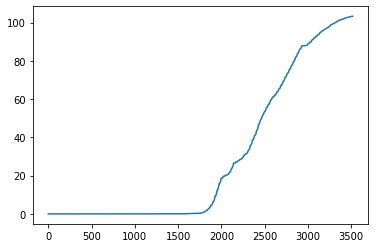

In [160]:
test = pd.read_csv('/home/disk/eos8/ach315/MAIZSIM/out1_724510_1995_var_40.txt')
test.columns = cols
plt.plot(test.dm_ear)

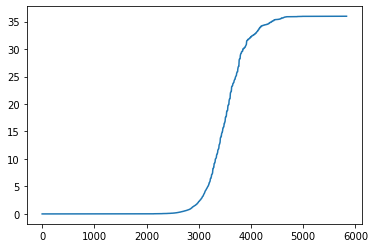

In [173]:
test = pd.read_csv('/home/disk/eos8/ach315/MAIZSIM/out1_727970_1990_var_15.txt')
test.columns = cols
plt.plot(test.dm_ear)

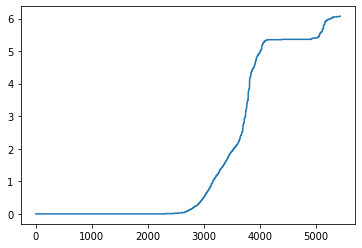

In [175]:
test = pd.read_csv('/home/disk/eos8/ach315/MAIZSIM/out1_726450_2001_var_35.txt')
test.columns = cols
plt.plot(test.dm_ear)

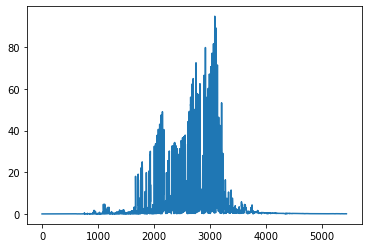

In [176]:
plt.plot(test.ET_suply)

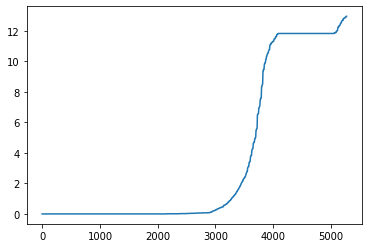

In [177]:
test = pd.read_csv('/home/disk/eos8/ach315/MAIZSIM/testruns/out1_726450_2001_var_35.txt')
test.columns = cols
plt.plot(test.dm_ear)

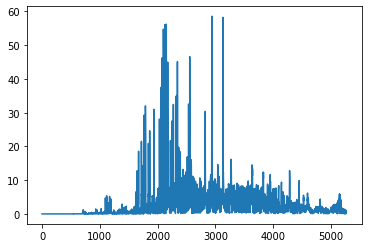

In [178]:
plt.plot(test.ET_suply)

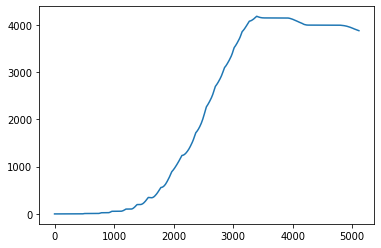

In [104]:
plt.plot(test.LA)

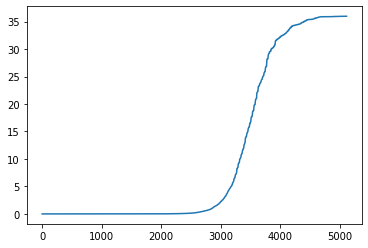

In [103]:
plt.plot(test.dm_ear)

In [105]:
test = pd.read_csv('/home/disk/eos8/ach315/MAIZSIM/out1_724510_1995_var_40.txt')
test.columns = cols

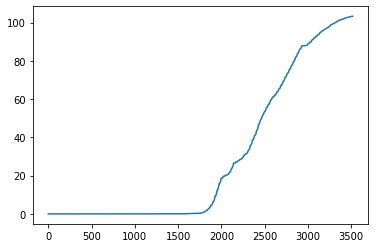

In [106]:
plt.plot(test.dm_ear)

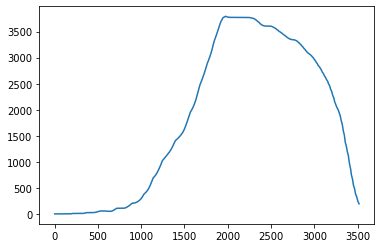

In [107]:
plt.plot(test.LA)

In [36]:
# read in individual weather data
df_temp_6190 = pd.read_csv('/home/disk/eos8/ach315/upscale/weadata/temp_6190_test1.csv', index_col=0)
df_rh_6190 = pd.read_csv('/home/disk/eos8/ach315/upscale/weadata/rh_6190_test1.csv', index_col=0)
df_precip_6190 = pd.read_csv('/home/disk/eos8/ach315/upscale/weadata/precip_6190_test1.csv', index_col=0)
df_solrad_6190 = pd.read_csv('/home/disk/eos8/ach315/upscale/weadata/solrad_6190.csv', index_col=0)

# re-index solar radiation data to only include growing season
df_solrad_6190 = df_solrad_6190.reindex(df_temp_6190.index)

# check that all met elements aligned - dataframe shape should match
print(df_temp_6190.shape)
print(df_rh_6190.shape)
print(df_precip_6190.shape)
print(df_solrad_6190.shape)

# convert station ID header from WBAN to USAF (in order to make continuous with 1991-2010)
df_stations = pd.read_csv('/home/disk/eos8/ach315/data/ISH_NSRD/stations_wban_usaf.csv', header=None, dtype='str')
df_stations.columns = ['WBAN', 'USAF']
sites_wban = list(df_temp_6190.columns)
sites_usaf = df_stations[df_stations['WBAN'].isin(sites_wban)]['USAF']

# assign new USAF headers
df_temp_6190.columns = sites_usaf; df_temp_6190 = df_temp_6190.sort_index(axis=1)
df_rh_6190.columns = sites_usaf; df_rh_6190 = df_rh_6190.sort_index(axis=1)
df_precip_6190.columns = sites_usaf; df_precip_6190 = df_precip_6190.sort_index(axis=1)
df_solrad_6190.columns = sites_usaf; df_solrad_6190 = df_solrad_6190.sort_index(axis=1)

(198000, 237)
(198000, 237)
(198000, 237)
(198000, 237)


In [39]:
## read in individual weather data
df_temp_9110 = pd.read_csv( '/home/disk/eos8/ach315/upscale/weadata/temp_9110_class1_test1.csv', index_col=0)
df_rh_9110 = pd.read_csv( '/home/disk/eos8/ach315/upscale/weadata/rh_9110_class1_test1.csv', index_col=0)
df_precip_9110 = pd.read_csv( '/home/disk/eos8/ach315/upscale/weadata/precip_9110_class1_test1.csv', index_col=0)
df_solrad_9110 = pd.read_csv( '/home/disk/eos8/ach315/upscale/weadata/solrad_9110_class1.csv', index_col=0)

# re-index solar radiation data to only include growing season
df_solrad_9110 = df_solrad_9110.reindex(df_temp_9110.index)

# check that all met elements aligned - dataframe shape should match
print(df_temp_9110.shape)
print(df_rh_9110.shape)
print(df_precip_9110.shape)
print(df_solrad_9110.shape)

(132000, 241)
(132000, 241)
(132000, 241)
(132000, 242)


In [40]:
df_temp = pd.concat([df_temp_6190, df_temp_9110], axis=0, join='outer'); df_temp = df_temp.sort_index(axis=1)
df_rh = pd.concat([df_rh_6190, df_rh_9110], axis=0, join='outer'); df_rh = df_rh.sort_index(axis=1)
df_precip = pd.concat([df_precip_6190, df_precip_9110], axis=0, join='outer'); df_precip = df_precip.sort_index(axis=1)
df_solrad = pd.concat([df_solrad_6190, df_solrad_9110], axis=0, join='outer'); df_solrad = df_solrad.sort_index(axis=1)

print(df_temp.shape)
print(df_rh.shape)
print(df_precip.shape)
print(df_solrad.shape)

#df_temp.to_csv('/home/disk/eos8/ach315/upscale/weadata/temp_all_test1.csv')
#df_rh.to_csv('/home/disk/eos8/ach315/upscale/weadata/rh_all_test1.csv')
#df_precip.to_csv('/home/disk/eos8/ach315/upscale/weadata/precip_all_test1.csv')
#df_solrad.to_csv('/home/disk/eos8/ach315/upscale/weadata/solrad_all_test1.csv')

(330000, 274)
(330000, 274)
(330000, 274)
(330000, 274)


# 2. filtering based on consecutive hours

In [41]:
# input variables for loop
datasets = list([df_temp, df_precip, df_solrad]) # weather datasets to process
                                                 # df_rh is based off df_temp, so no need to evaluate 

finalist = list([[], [], []]) # final lists to store processed output
                              # order: [0]-temp, [1]-precip, [2]-solrad

years = np.arange(1961, 2011) # years
growseason_start = '-03-01 00:00:00'
growseason_end = '-11-30 23:00:00' 

crit_hrs = 2 # critical hrs of missing data

# loop through temp, precip & solrad dataset to pick out usable site-years
for i in np.arange(len(datasets)):
    dataset = datasets[i]
    siteyears_all = list()
    sites = dataset.columns
    
    for j in years:
        start_time = str(j) + growseason_start
        end_time = str(j) + growseason_end
        siteyears = list()
        
        for k in sites:
            df = dataset.loc[start_time:end_time, k] 
            df = pd.DataFrame(df)
            df['group'] = df.notnull().astype(int) # df.notnull() returns TRUE or FALSE, 
                                                   # .astype(int) turns TRUE into 1, and FALSE into 0
            df['group'] = df.group.cumsum() # calculating cumulative sum 
            df = df[df.iloc[:,0].isnull()] # selecting out individual timesteps that have missing data
            df['count'] = df.groupby('group')['group'].transform('size') # counts the number of consecutive NANs 
            df = df.drop_duplicates('group')
            
            if df[df['count'] > crit_hrs].shape[0] == 0:
                use_siteyear = str(j) + '_' + str(k)
                siteyears.append(use_siteyear) # only record site-years that have fewer consecutive NANs than the critical value set
        
        siteyears_all.extend(siteyears)
    
    finalist[i] = siteyears_all
    
# assign output to individual siteyears - crithr = 2
siteyears_temp = finalist[0]
siteyears_precip = finalist[1]
siteyears_solrad = finalist[2]
print('temp:', len(siteyears_temp))
print('precip:', len(siteyears_precip))
print('solrad:', len(siteyears_solrad))

# identify overlapping siteyears
siteyears = list(set(siteyears_temp) & set(siteyears_precip))
siteyears = list(set(siteyears) & set(siteyears_solrad))
siteyears.sort()
siteyears_crithr2 = siteyears

print('overlapping siteyears:', len(siteyears))

temp: 6096
precip: 4397
solrad: 11937
overlapping siteyears: 4225


# 3. storing filtered site-year info

In [42]:
siteyears = siteyears_crithr2 ### update this

# what are the valid site-years?
years = list()
sites = list()

for i in range(len(siteyears)):
    year = siteyears[i][0:4]
    years.append(year)
    site = siteyears[i][5:11] 
    sites.append(site)

df_siteyears = pd.DataFrame({'site': sites, 'year': years}, 
                            columns=['site', 'year'])
df_siteyears = df_siteyears.sort_values(['site', 'year'])
final_sites = list(set(df_siteyears.site))

# how many years of data do each site have?
site_nyears = list()

for i in final_sites:
    years = len(df_siteyears[df_siteyears["site"] == i])
    site_nyears.append(years)
    
df_site_nyears = pd.DataFrame({"site": final_sites, "years": site_nyears})
df_site_nyears = df_site_nyears.sort_values(["site"])
df_site_nyears = df_site_nyears.reset_index().iloc[:, 1:3]

# writing out info as .csv
#df_siteyears.to_csv('/home/disk/eos8/ach315/upscale/weadata/siteyears_crithr2_test1.csv')
#df_site_nyears.to_csv('/home/disk/eos8/ach315/upscale/weadata/site_nyears_crithr2_test1.csv')

# 4. filtering based on area & irrigation

In [43]:
# read in station & site-year info
df_site_nyears = pd.read_csv('/home/disk/eos8/ach315/upscale/weadata/site_nyears_crithr2_test1.csv', index_col=0)
df_stations_9110 = pd.read_csv('/home/disk/eos8/ach315/upscale/weadata/stations_info_9110.csv', usecols=[0,1,3,4,8,9,10])
df_sites_info = df_stations_9110[df_stations_9110.USAF.isin(df_site_nyears.site)]
df_sites_info.columns = ['site', 'class', 'station', 'state', 'tzone', 'lat', 'lon']

# merge site info & site-years info
df_sites_info = pd.merge(df_sites_info, df_site_nyears, on='site')

# drop stations from Alaska, Guam, Hawaii & Puerto Rico
df_sites_info = df_sites_info[(df_sites_info.state != 'AK') & (df_sites_info.state != 'GU') & 
                              (df_sites_info.state != 'HI')& (df_sites_info.state != 'PR')]

# final station list
df_sites_info.reset_index(inplace=True, drop=True)

state = pd.read_csv('/home/disk/eos3/aswann/Shared/Data/irrigated_area/stateID.txt', header=None, sep='\s+')
county = pd.read_csv('/home/disk/eos3/aswann/Shared/Data/irrigated_area/countyID.txt', header=None, sep='\s+')
lat = pd.read_csv('/home/disk/eos3/aswann/Shared/Data/irrigated_area/lat_county.txt', header=None, sep='\s+')
lon = pd.read_csv('/home/disk/eos3/aswann/Shared/Data/irrigated_area/lon_county.txt', header=None, sep='\s+')
irri = pd.read_csv('/home/disk/eos3/aswann/Shared/Data/irrigated_area/irr_area_acres.txt', header=None, sep='\s+')
area = pd.read_csv('/home/disk/eos3/aswann/Shared/Data/irrigated_area/crop_area_acres.txt', header=None, sep='\s+')
state = state.iloc[0,:]
county = county.iloc[0,:]
lat = lat.iloc[0,:]
lon = lon.iloc[0,:]

# raw data includes data from 4 censuses that show data of 1997, 2002, 2007 & 2012
# we average data from all 4 censuses 
irri = irri.mean(axis=1)
area = area.mean(axis=1)
df_obs = pd.DataFrame({'state': state, 'county': county, 'lat': lat, 'lon': lon, 
                       'irri_area': irri, 'crop_area': area, 'perct_irri': irri/area*100})

sites = df_sites_info.site
areas = []
perct_irris = []

for site in sites:
    lat = float(df_sites_info[df_sites_info.site == site].lat)
    lon = float(df_sites_info[df_sites_info.site == site].lon)
    dist = list(enumerate(np.sqrt((lat - df_obs.lat)**2 + (lon - (df_obs.lon))**2)))
    df_dist = pd.DataFrame(dist, columns=['rownum', 'distance'])
    row = list(df_dist.nsmallest(5, 'distance').rownum) # select the five nearest locations and average for
                                                        # cropping area & irrigation percentage
    area = df_obs.iloc[row].crop_area.mean()
    perct_irri = df_obs.iloc[row].perct_irri.mean()
    areas.append(area)
    perct_irris.append(perct_irri)

# add planting area & irrigation info for filtering purposes
df_filter = pd.DataFrame({'area': areas, 'perct_irri': perct_irris})
df_summary = pd.concat([df_sites_info, df_filter], axis=1)

# filter
df_filtered = df_summary[(df_summary.area > 50000) & (df_summary.perct_irri < 50)] 

# how many site-years left?
print('prior:', sum(df_summary.years.astype(int)))
print('after filtering:', sum(df_filtered.years.astype(int)))

prior: 4076
after filtering: 2164


# 5. Visualizing climate space

In [60]:
df_filtered = df_summary[(df_summary.area > 50000) & (df_summary.perct_irri < 50)]
siteyear_ctr2 = pd.read_csv('/home/disk/eos8/ach315/upscale/weadata/siteyears_crithr2_test1.csv', usecols=[1,2]) 
siteyears = siteyear_ctr2[siteyear_ctr2.site.isin(df_filtered.site)]

temp_all = [np.nan]*siteyears.shape[0]
rh_all = [np.nan]*siteyears.shape[0]
precip_all = [np.nan]*siteyears.shape[0]

for i in np.arange(siteyears.shape[0]):
    temp = df_temp_t.loc[siteyears.iloc[i,1].astype(str) + '-04-01' : 
                       siteyears.iloc[i,1].astype(str) +'-10-31', 
                       siteyears.iloc[i,0].astype(str)].mean()
    rh = df_rh_t.loc[siteyears.iloc[i,1].astype(str) + '-04-01' : 
                   siteyears.iloc[i,1].astype(str) +'-10-31', 
                   siteyears.iloc[i,0].astype(str)].mean()
    precip = df_precip_t.loc[siteyears.iloc[i,1].astype(str) + '-04-01' : 
                           siteyears.iloc[i,1].astype(str) +'-10-31', 
                           siteyears.iloc[i,0].astype(str)].sum()
    

    temp_all[i] = temp
    rh_all[i] = rh
    precip_all[i] = precip

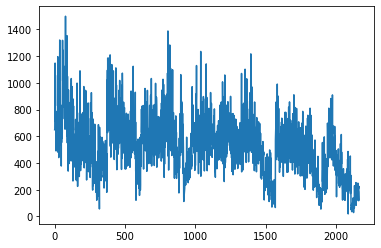

In [61]:
plt.plot(precip_all)

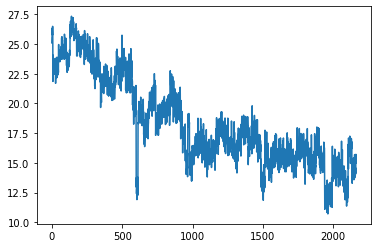

In [62]:
plt.plot(temp_all)

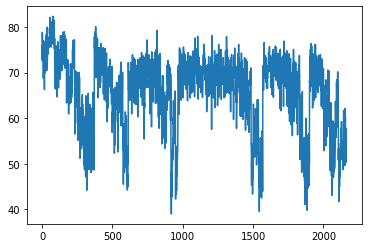

In [63]:
plt.plot(rh_all)

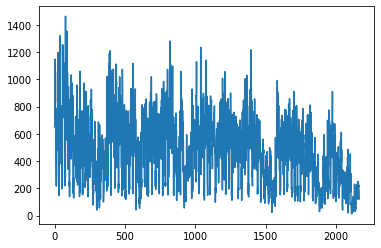

In [51]:
plt.plot(precip_all)

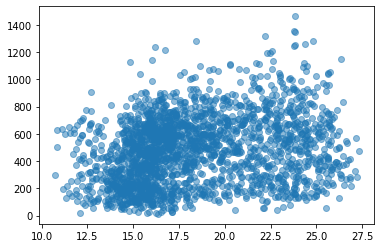

In [47]:
plt.scatter(temp_all, precip_all, alpha=0.5)

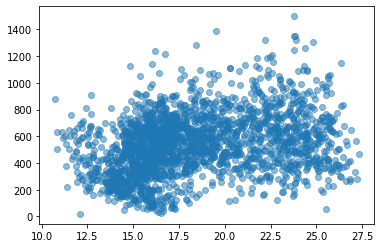

In [65]:
plt.scatter(temp_all, precip_all, alpha=0.5)

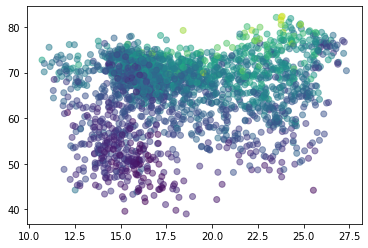

In [73]:
plt.scatter(temp_all, rh_all, alpha=0.5, c=precip_all)

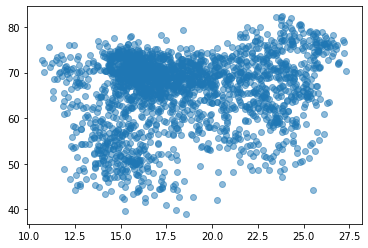

In [66]:
plt.scatter(temp_all, rh_all, alpha=0.5)